# Clustering
* Notebook used to reduce the number of genres in the dataset to only 18 via a combination of agglomerative clustering and manual input
* Generated a .csv file from the resulting 'simplified' data (stored under `data/spotify_clean.csv`)

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

pd.options.display.max_columns = 200

songs = pd.read_csv('data/spotify_clean.csv', index_col=[0])
# Drop non-numerical attributes
songs_og = songs.copy()
songs = songs.drop(columns = ["track_id", "artists", "album_name", "track_name"])
# Convert boolean column to int
songs['explicit'] = songs['explicit'].astype(int)

# Use aggregated dataset to perform agglomerative clustering (its faster than on the full datset)
by_genre = songs.groupby('track_genre').mean()
# Normalize data before clustering since clustering relies on distances
scaler = StandardScaler()
by_genre[by_genre.columns] = scaler.fit_transform(by_genre.values)
by_genre.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
track_genre,,,,,,,,,,,,,,,
acoustic,0.736338,-0.287149,-0.300480,-0.180732,-1.186451,-0.873104,-0.321029,1.536988,-0.614531,1.076677,-0.623400,-0.784059,-0.373230,-0.337872,-0.157990
afrobeat,-0.823863,0.464187,-0.562029,0.865356,0.373197,0.941325,0.139604,-0.968784,-0.024103,-0.200820,0.479033,-0.373596,1.525727,-0.307932,0.339025
alt-rock,0.810516,0.131978,-0.488993,-0.196342,0.659874,1.815214,0.625431,-0.015982,-0.513097,-0.879232,-0.517751,0.043002,0.356458,0.051079,0.290183
alternative,-1.704503,-0.570287,1.669451,0.519720,0.137168,-1.657316,0.616622,-0.724802,-0.041795,-0.547433,-0.650990,-0.309448,0.267793,-0.659987,0.533182
ambient,0.860693,-0.035901,-0.654370,-1.800736,-2.424870,-1.278296,-3.189106,-0.202973,-0.624809,2.100194,2.600445,-1.139316,-2.134621,-1.306927,-2.312860


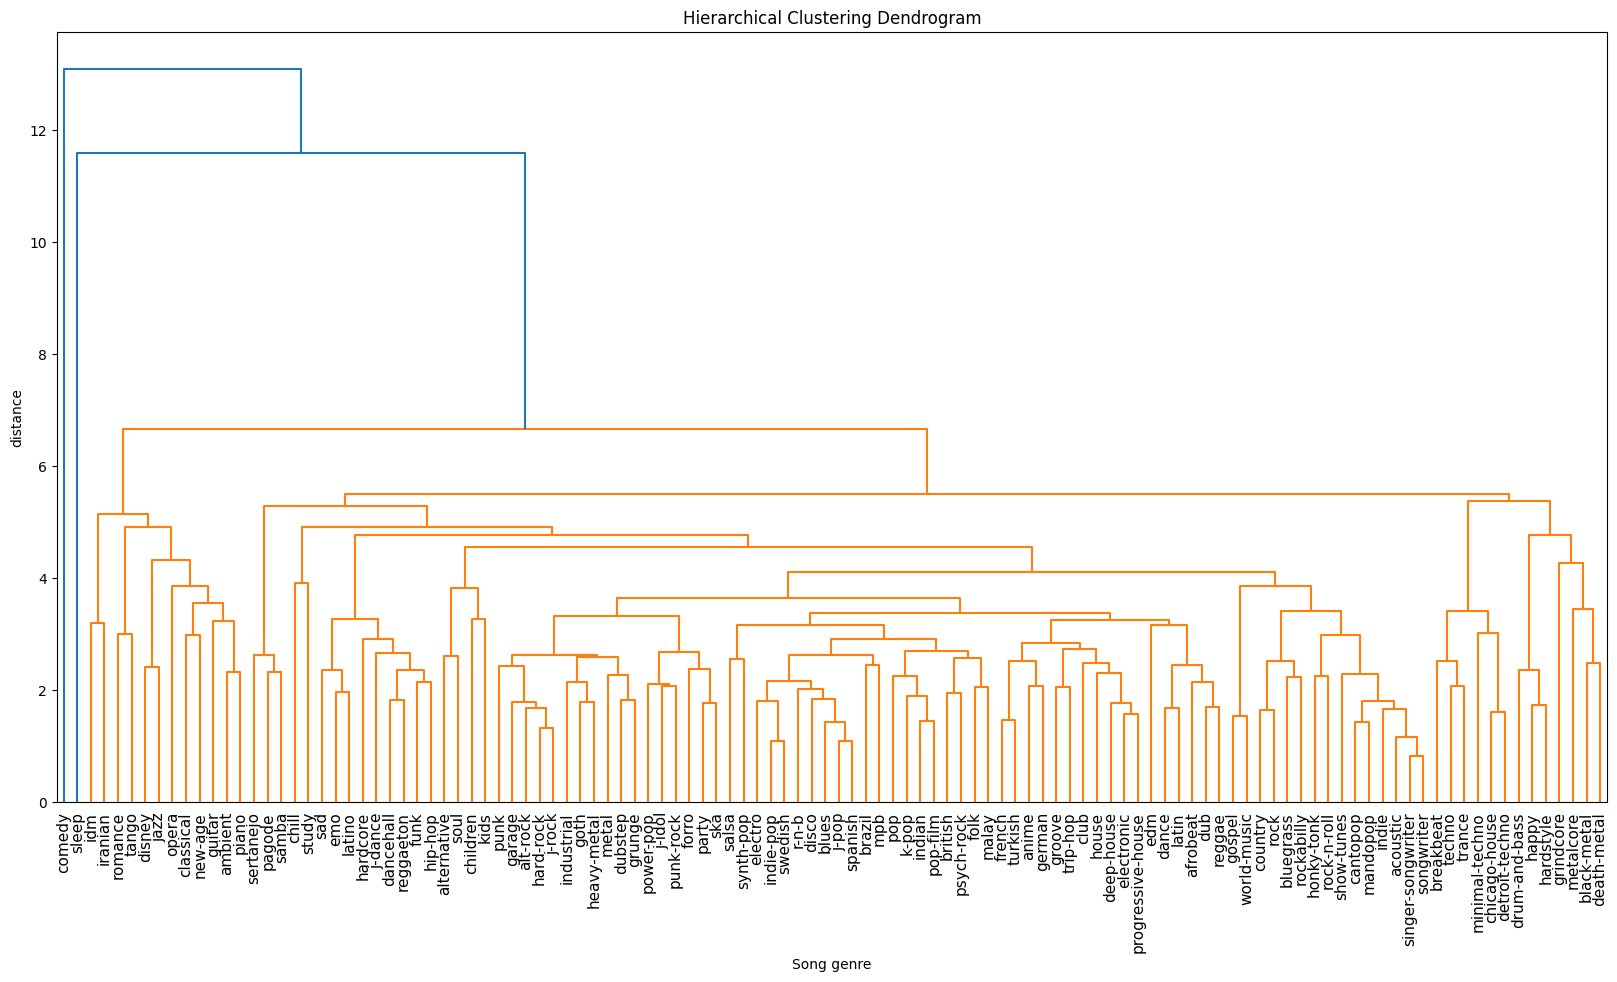

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# create the hierarchical clustering
Z = linkage(by_genre, 'average')

plt.figure(figsize=(20, 10))
# plot the dendrogram
dendrogram(Z, labels=list(by_genre.index))
# set the plot title
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Song genre')
plt.ylabel('distance')
plt.xticks(fontsize=11)
plt.show()

### Manual grouping based on dendrogram (18 genres)
* Hand-crafted the following grouping based on the info on the dendrogram and by googling the parent genres of each genre

In [26]:
genre_mapping = {
    'sleep': set(['sleep']),
    'comedy': set(['comedy']),
    'ambient': set(['ambient', 'piano', 'guitar', 'study', 'sad', 'chill', 'new-age']),
    'children': set(['children', 'kids','disney']),
    'classical': set(['classical', 'opera', 'romance']),
    'show-tunes': set(['show-tunes', 'singer-songwriter', 'songwriter']),
    'folk': set(['folk', 'gospel', 'jazz', 'soul', 'funk', 'afrobeat', 'blues', 'r-n-b', 'groove', 'disco']),
    'country': set(['honky-tonk', 'bluegrass', 'country']),
    'pop': set(['pop', 'indie-pop', 'pop-film', 'k-pop', 'j-idol', 'j-pop', 'power-pop', 'synth-pop']),
    'rock': set(['indie', 'rock-n-roll', 'punk-rock', 'rock', 'alternative', 'j-rock', 'rockabilly', 'psych-rock', 'goth', 'punk', 'hard-rock', 'alt-rock', 'hardcore', 'emo', 'acoustic']),
    'hip-hop': set(['trip-hop', 'hip-hop']),
    'metal': set(['grindcore', 'metalcore', 'grunge', 'metal', 'black-metal', 'death-metal', 'heavy-metal']),
    'edm': set(['idm', 'edm', 'party', 'dance', 'j-dance', 'club', 'garage', 'electronic', 'electro', 'dubstep', 'industrial',  'house', 'progressive-house', 'deep-house']),
    'techno': set(['techno', 'minimal-techno', 'chicago-house', 'detroit-techno', 'breakbeat', 'trance', 'hardstyle', 'happy', 'drum-and-bass']),
    'world': set(['world-music', 'mandopop', 'cantopop', 'malay', 'anime', 'indian', 'iranian']),
    'european': set(['british', 'german', 'french', 'swedish', 'turkish']),
    'latin': set(['latin', 'latino', 'salsa', 'tango', 'spanish', 'reggaeton', 'brazil', 'sertanejo', 'forro', 'pagode', 'samba', 'mpb']),
    'reggae': set(['reggae', 'ska', 'dub', 'dancehall'])
}

In [27]:
# Check that I didn't forget or misspell any of the original music genres
for genre in songs['track_genre'].unique():
    found = False
    for subgenres in genre_mapping.values():
        if genre in subgenres:
            found = True
            break
    if not found:
        print(f'Missing or misspelled genre: {genre}')

In [28]:
# Apply new genre groupping to entire dataset
songs = pd.read_csv('data/spotify_clean.csv', index_col=[0])
print(f"Unique genres before transformation: {len(songs['track_genre'].unique())}")

Unique genres before transformation: 114


In [29]:
modified_genres = []
for i in range(len(songs)):
    genre = songs['track_genre'].iloc[i]
    for parent_genre, sub_genres in genre_mapping.items():
        if genre in sub_genres:
            modified_genres.append(parent_genre)
            break
songs['track_genre'] = modified_genres
print(f"Unique genres after transformation: {len(songs['track_genre'].unique())}")

Unique genres after transformation: 18


In [30]:
# Save new dataset
songs.to_csv('data/spotify_simplified.csv')